## AI Deepfake Detection - EDA

## Imports

In [9]:
import pandas as pd
import json
import os
from IPython.display import Video

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Exploratory Data Analysis (EDA)

In [10]:
# Helper functions to load data/video
def load_metadata(metadata_path):
    """Load metadata from a JSON file and return a DataFrame."""
    with open(metadata_path) as f:
        metadata = json.load(f)
    df = pd.DataFrame.from_dict(metadata, orient='index')
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'video_filename'}, inplace=True)
    return df

def play_video(video_filename, video_folder='../data/train_sample_videos'):
    """Play a video given its filename."""
    video_path = os.path.join(video_folder, video_filename)
    if os.path.exists(video_path):
        return Video(video_path,width=320, height=320)
    else:
        print(f"Video file {video_filename} does not exist.")

In [14]:
## Load the training and test set
train_metadata_path = '../data/train_sample_videos/metadata.json'
train_metadata_df = load_metadata(train_metadata_path)
train_metadata_df

,video_filename,label,split,original
0,aagfhgtpmv.mp4,FAKE,train,vudstovrck.mp4
1,aapnvogymq.mp4,FAKE,train,jdubbvfswz.mp4
2,abarnvbtwb.mp4,REAL,train,None
3,abofeumbvv.mp4,FAKE,train,atvmxvwyns.mp4
4,abqwwspghj.mp4,FAKE,train,qzimuostzz.mp4
...,...,...,...,...
395,etejaapnxh.mp4,FAKE,train,wtreibcmgm.mp4
396,etmcruaihe.mp4,FAKE,train,afoovlsmtx.mp4
397,etohcvnzbj.mp4,FAKE,train,bdnaqemxmr.mp4
398,eudeqjhdfd.mp4,REAL,train,None


In [35]:
# Distribution of real vs fake
def plot_label_distribution(df):
    """Plot the percentage distribution of real and fake videos, showing both percentage and raw counts."""

    # Calculate the raw counts and percentages
    label_counts = df['label'].value_counts()
    label_percentages = df['label'].value_counts(normalize=True) * 100

    # Create a DataFrame to combine both counts and percentages
    label_df = pd.DataFrame({'Count': label_counts, 'Percentage': label_percentages})

    # Plot the counts
    plt.figure(figsize=(6, 6))
    ax = sns.barplot(hue=label_df.index, x=label_df.index, 
                     y=label_df['Count'], palette='coolwarm',
                     legend=False)

    # Add labels with both raw counts and percentages
    for i in ax.containers:
        ax.bar_label(i, labels=[f'{v.get_height():,.0f} ({v.get_height()/label_counts.sum()*100:.1f}%)' for v in i])

    # Set plot titles and labels
    plt.title('Distribution of Real vs Fake Videos')
    plt.xlabel('Video Label')
    plt.ylabel('Count')
    plt.show()

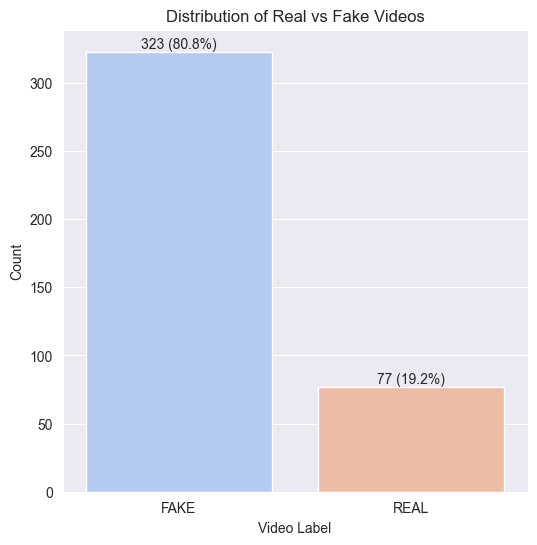

In [36]:
plot_label_distribution(train_metadata_df)

Currently, the metadata file is quite limited, only telling us the video name and the label of the video, which will help us in training our model. However, we also want to take a look at metadata about the videos themselves, so we will write some code to get this information out.